# Machine Learning Model


The aim of this notebook will be to implement a Logistic Regression model and analyze its performance with different indepent attributes.

The model will be trained with pre-processed data that'll have categorical variables and no outliers.

The package will be sci-kit learn and the data set source: kaggle.com

#### Some conclusions from the exploratory data analysis:

 - Children of age between 0 - 10 years were the most likely to survive. This group almost perfectly mixed between males and females.
 - It was noticed that even though there were more males in the boat, more females survived as a result of priorities when using safety boats.
 - People with 1st class tickets where the most likely to survive with a 50% chance, whereas 3rd class were the less likely with a chances of only 24%, it was also the class with more people.
 - Outliers for Age and Fare were slightly removed reducing the number of possible training entries to 762.
 - Embarked, Pclass, Sex and Survived were changed to categorical variables.
 - Embarked port doesn't seem to have and impact on whether a passenger survived or not. As it presents the same distribution.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn import metrics

df = pd.read_pickle('./train_grouped.pkl')

In [152]:
indepent_variables = ['Pclass', 'Age', 'Fare', 'Embarked', 'Parch']
dependent_variable = ['Survived']

df.loc[df.Sex == 'male', 'Sex_encoded'] = 1
df.loc[df.Sex == 'female', 'Sex_encoded'] = 0

dummies_embarked = pd.get_dummies(df.Embarked)
df = df.join(dummies_embarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_prob_age,Survival_prob_pclass,Sex_encoded,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.301408,0.247401,1.0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.301408,0.247401,0.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.345324,0.518868,0.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.345324,0.247401,1.0,0,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0.301408,0.247401,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.301408,0.485714,1.0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.348315,0.518868,0.0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.301408,0.247401,0.0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.301408,0.518868,1.0,1,0,0


In [177]:
model_ols = LogisticRegression()
encoded_independent_variables = ['Sex_encoded', 'Age','Pclass', 'C', 'Q', 'S', 'Parch']


In [178]:
model_ols.fit(X=df[encoded_independent_variables], y=df.Survived)
df['Pred_Survived'] = model_ols.predict(X=df[encoded_independent_variables])
df.head()
model_ols.predict_proba(X=df[encoded_independent_variables])

array([[0.88373618, 0.11626382],
       [0.44619046, 0.55380954],
       [0.11137355, 0.88862645],
       ...,
       [0.53474888, 0.46525112],
       [0.37778714, 0.62221286],
       [0.87729087, 0.12270913]])

In [179]:
df[['Survived', 'Pred_Survived']].head(20)

,Survived,Pred_Survived
0,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,1,1
10,1,1


In [180]:
mean_squared_error(df.Survived, df.Pred_Survived)

0.2073490813648294

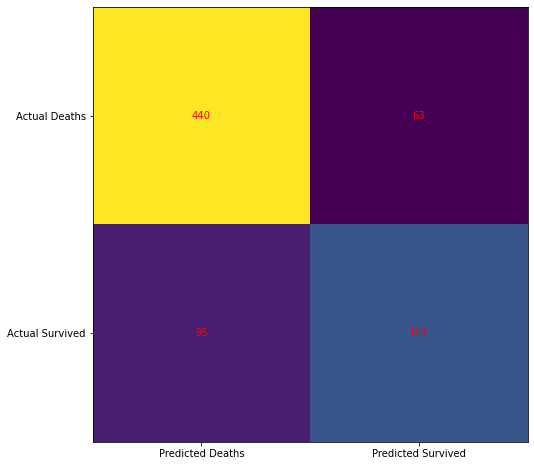

In [181]:
cm = confusion_matrix(df.Survived, model_ols.predict(X=df[encoded_independent_variables]))


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Deaths', 'Predicted Survived'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Deaths', 'Actual Survived'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [182]:
model_ols.score(df[encoded_independent_variables], df.Survived)

0.7926509186351706